In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
%matplotlib inline

In [2]:
# Import et aperçu des datasets
df_2024_Table = pd.read_excel("C:/Users/annel/OneDrive/Documents/1_Formation_Datascientest/Projet_final/Git-Analyse_du_bien_etre/DataForTable2.1.xls")
df_continents = pd.read_csv("C:/Users/annel/OneDrive/Documents/1_Formation_Datascientest/Projet_final/Git-Analyse_du_bien_etre/continents2.csv")

display(df_2024_Table.head())
display(df_continents.head())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [3]:
# Correspondance des noms de pays
df_2024_Table['Country name'] = df_2024_Table['Country name'].replace({'Türkiye':'Turkey',
                                                                       'Taiwan Province of China':'Taiwan',
                                                                       'Hong Kong S.A.R. of China':'Hong Kong'
                                                                       })

df_continents['name'] = df_continents['name'].replace({'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                                                       'Congo (Democratic Republic Of The)':'Congo (Brazzaville)',
                                                       'Congo':'Congo (Kinshasa)',
                                                       "Côte D'Ivoire":'Ivory Coast',
                                                       'Czech Republic':'Czechia',
                                                       'Macedonia':'North Macedonia',
                                                       'Palestine, State of':'State of Palestine'
                                                       })

# Merge des 2 datasets
df_2024 = pd.merge(df_2024_Table, df_continents[['name', 'region','sub-region']], left_on = "Country name", right_on = "name", how = 'left')

# Drop colonne "name"
df_2024.drop(columns='name', inplace=True)

# Ordre et casse des colonnes
df_2024 = df_2024[['Country name', 'region', 'sub-region'] + [col for col in df_2024.columns if col not in ['Country name', 'region', 'sub-region']]]

df_2024 = df_2024.rename(columns={'region': 'Region', 'sub-region': 'Sub region', 'year': 'Year'})

# Ajout données Kosovo
df_2024.loc[df_2024['Country name'] == 'Kosovo', ['Region', 'Sub region']] = ['Europe', 'Southern Europe']

# Conservation des 10 dernières années 
df_2024 = df_2024.drop(df_2024[df_2024.Year < 2014].index)

In [4]:
display(df_2024.head())

,Country name,Region,Sub region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
6,Afghanistan,Asia,Southern Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,Asia,Southern Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,Asia,Southern Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,Asia,Southern Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326
10,Afghanistan,Asia,Southern Asia,2018,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,0.384561,0.404904


In [5]:
print("Avant de définir 'Year' comme index:")
df_2024.head()

Avant de définir 'Year' comme index:


,Country name,Region,Sub region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
6,Afghanistan,Asia,Southern Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,Asia,Southern Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,Asia,Southern Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,Asia,Southern Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326
10,Afghanistan,Asia,Southern Asia,2018,2.694303,7.630801,0.507516,53.575001,0.373536,-0.094552,0.927606,0.384561,0.404904


In [6]:
df_2024.index

Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   21,
       ...
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362],
      dtype='int64', length=1374)

In [7]:
unique_values = df_2024['Sub region'].unique()
print(unique_values)

['Southern Asia' 'Southern Europe' 'Northern Africa' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Western Asia'
 'Australia and New Zealand' 'Western Europe' 'Eastern Europe'
 'South-eastern Asia' 'Northern America' 'Eastern Asia' 'Northern Europe'
 'Central Asia']


In [8]:
print('Data Types:')
print(df_2024.dtypes)
print(df_2024.index)

Data Types:
Country name                         object
Region                               object
Sub region                           object
Year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object
Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   21,
       ...
       2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362],
      dtype='int64', length=1374)


In [9]:
df_2024.set_index('Year', inplace=True)

In [10]:
df_2024.head()

df = df_2024[['Life Ladder', 'Sub region']]

In [11]:
print(df.index)

Index([2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2014,
       ...
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Year', length=1374)


In [12]:
# On selectionne les colonnes 'Life Ladder' et 'Sub region' tout en conservant l'index
df_filtered = df_2024[['Life Ladder', 'Sub region']]

#Vérificatioon du DataFrame final
print(df_filtered.head())
print(df_filtered.info())  # Pour s'assurer du type de l'index

df_filtered.head()


      Life Ladder     Sub region
Year                            
2014     3.130896  Southern Asia
2015     3.982855  Southern Asia
2016     4.220169  Southern Asia
2017     2.661718  Southern Asia
2018     2.694303  Southern Asia
<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 2014 to 2023
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Life Ladder  1374 non-null   float64
 1   Sub region   1374 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.2+ KB
None


,Life Ladder,Sub region
Year,,
2014,3.130896,Southern Asia
2015,3.982855,Southern Asia
2016,4.220169,Southern Asia
2017,2.661718,Southern Asia
2018,2.694303,Southern Asia


In [13]:
# On groupe les données par 'Sub region' et on calcul la médiane de 'Ladder life'
median_ladder_life = df_filtered.groupby('Sub region')['Life Ladder'].median()

# Affichage des résultats
median_ladder_life.head()

Sub region
Australia and New Zealand          7.229841
Central Asia                       5.810347
Eastern Asia                       5.851548
Eastern Europe                     5.917058
Latin America and the Caribbean    6.085758
Name: Life Ladder, dtype: float64

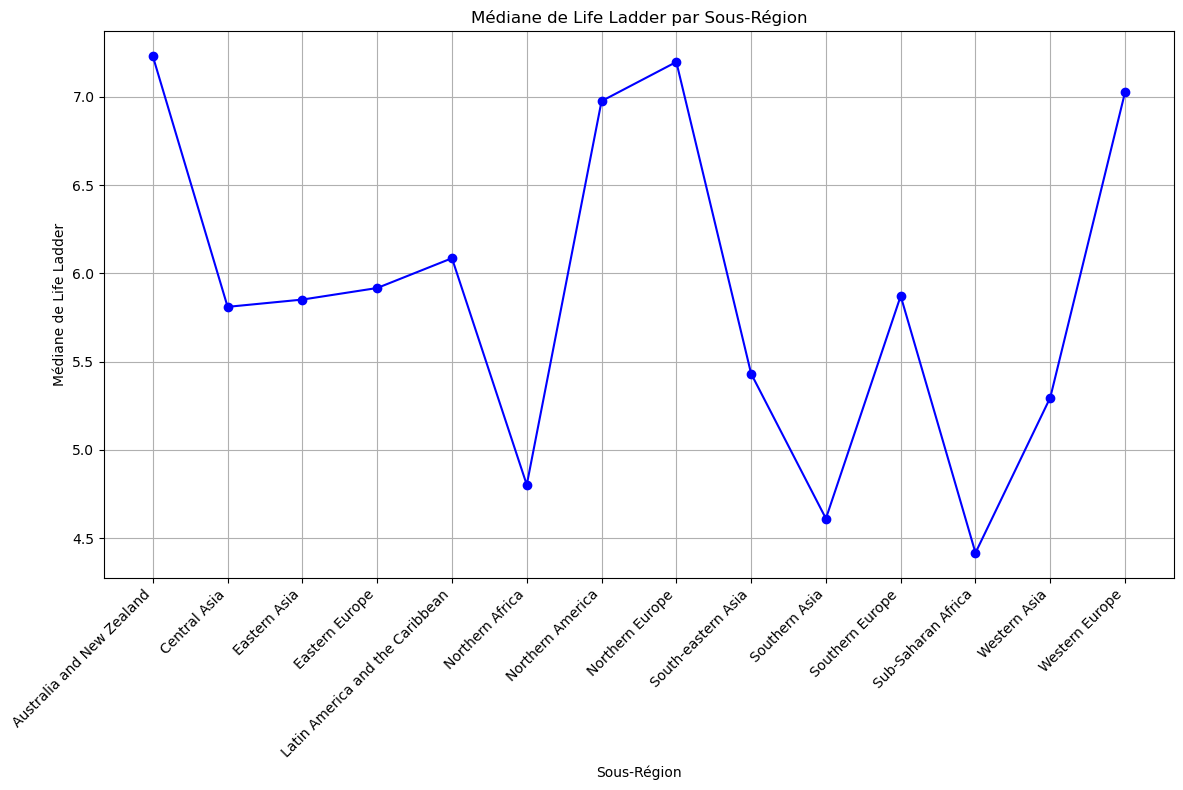

In [14]:
# Convertion la série en DataFrame
median_df = median_ladder_life.reset_index()
median_df.columns = ['Sub region', 'Life Ladder']

# création d'un tracé en courbe des médianes
plt.figure(figsize=(12, 8))
plt.plot(median_df['Sub region'], median_df['Life Ladder'], marker='o', linestyle='-', color='b')

plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()  # Ajustement des marges pour éviter que les labels ne se chevauchent
plt.show()

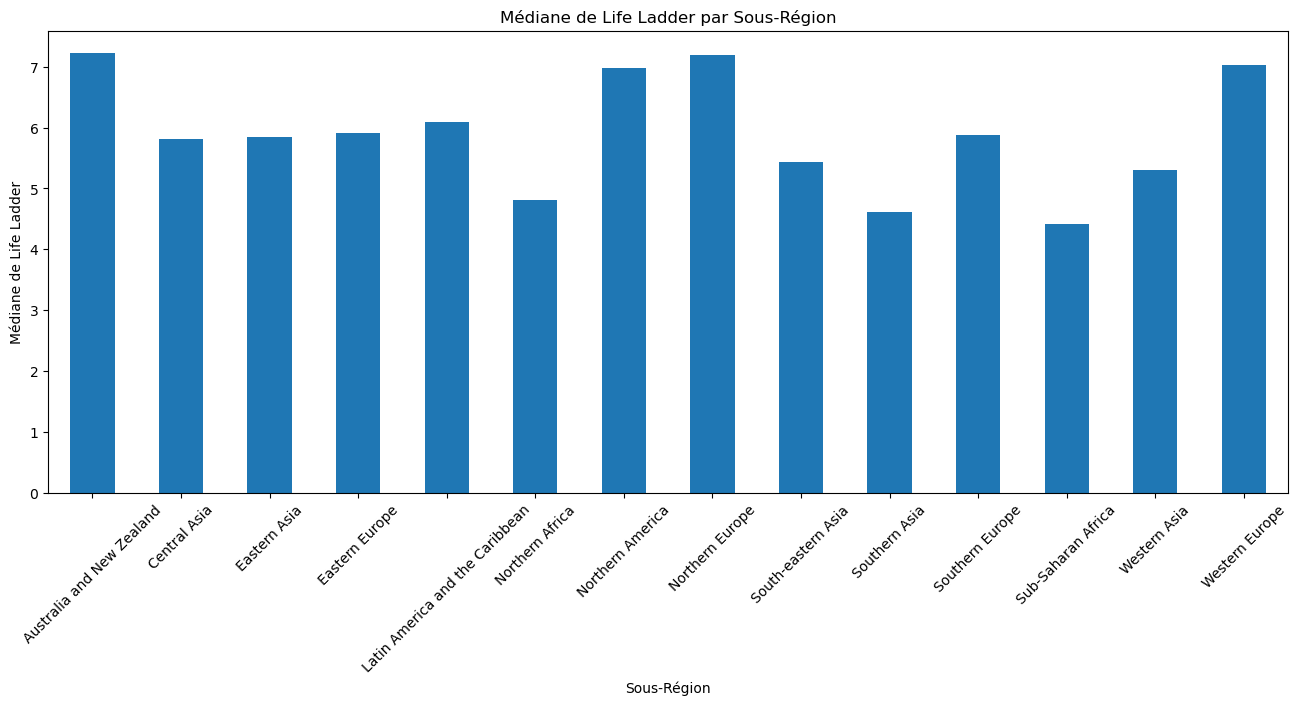

In [15]:
# Calcul de la médiane de 'Life Ladder' pour chaque sous-région
median_ladder_life = df.groupby('Sub region')['Life Ladder'].median()

# Tracer les résultats
plt.figure(figsize=(16, 6))
median_ladder_life.plot(kind='bar')
plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Calcule de la médiane de 'Life Ladder' pour chaque sous-région par année
median_ladder_by_region = df.groupby(['Sub region', df.index])['Life Ladder'].median().unstack(level=0)

print(median_ladder_by_region)

Sub region  Australia and New Zealand  Central Asia  Eastern Asia  \
Year                                                                
2014                         7.297221      5.787379      5.629688   
2015                         7.363591      5.791460      5.780211   
2016                         7.237884      5.533552      5.726536   
2017                         7.292110      5.829234      5.618181   
2018                         7.273640      5.497469      5.793575   
2019                         7.219585      5.685221      5.781067   
2020                         7.197375      6.005100      5.902030   
2021                         7.124150      5.874504      5.977095   
2022                         7.004841      5.837060      5.950014   
2023                         7.000269      6.104471      6.111919   

Sub region  Eastern Europe  Latin America and the Caribbean  Northern Africa  \
Year                                                                           
2014       

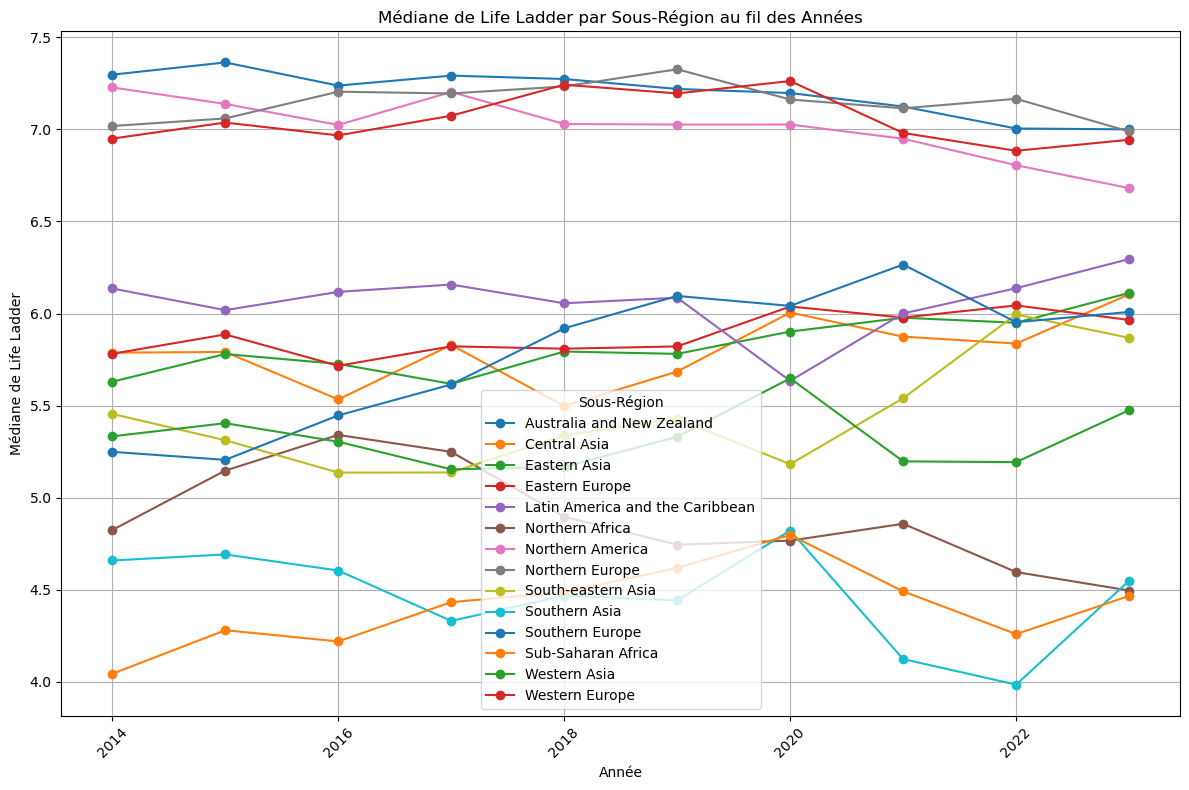

In [17]:
import matplotlib.pyplot as plt

# Création d'un tracé en courbe des médianes par sous-région
plt.figure(figsize=(12, 8))
for region in median_ladder_by_region.columns:
    plt.plot(median_ladder_by_region.index, median_ladder_by_region[region], marker='o', label=region)

plt.title('Médiane de Life Ladder par Sous-Région au fil des Années')
plt.xlabel('Année')
plt.ylabel('Médiane de Life Ladder')
plt.legend(title='Sous-Région')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Sélection uniquement des colonnes 'Ladder life' et 'Sub region'
df = df_2024[['Life Ladder', 'Sub region']]
df.head()

,Life Ladder,Sub region
Year,,
2014,3.130896,Southern Asia
2015,3.982855,Southern Asia
2016,4.220169,Southern Asia
2017,2.661718,Southern Asia
2018,2.694303,Southern Asia


In [19]:
median_ladder_life = df.groupby('Sub region')['Life Ladder'].median()
print(median_ladder_life)

Sub region
Australia and New Zealand          7.229841
Central Asia                       5.810347
Eastern Asia                       5.851548
Eastern Europe                     5.917058
Latin America and the Caribbean    6.085758
Northern Africa                    4.802618
Northern America                   6.975424
Northern Europe                    7.197111
South-eastern Asia                 5.432003
Southern Asia                      4.611607
Southern Europe                    5.872055
Sub-Saharan Africa                 4.417330
Western Asia                       5.296662
Western Europe                     7.025767
Name: Life Ladder, dtype: float64


In [20]:
median_df = median_ladder_life.reset_index()
median_df.columns = ['Sub region', 'Life Ladder']

print(median_df)

                         Sub region  Life Ladder
0         Australia and New Zealand     7.229841
1                      Central Asia     5.810347
2                      Eastern Asia     5.851548
3                    Eastern Europe     5.917058
4   Latin America and the Caribbean     6.085758
5                   Northern Africa     4.802618
6                  Northern America     6.975424
7                   Northern Europe     7.197111
8                South-eastern Asia     5.432003
9                     Southern Asia     4.611607
10                  Southern Europe     5.872055
11               Sub-Saharan Africa     4.417330
12                     Western Asia     5.296662
13                   Western Europe     7.025767


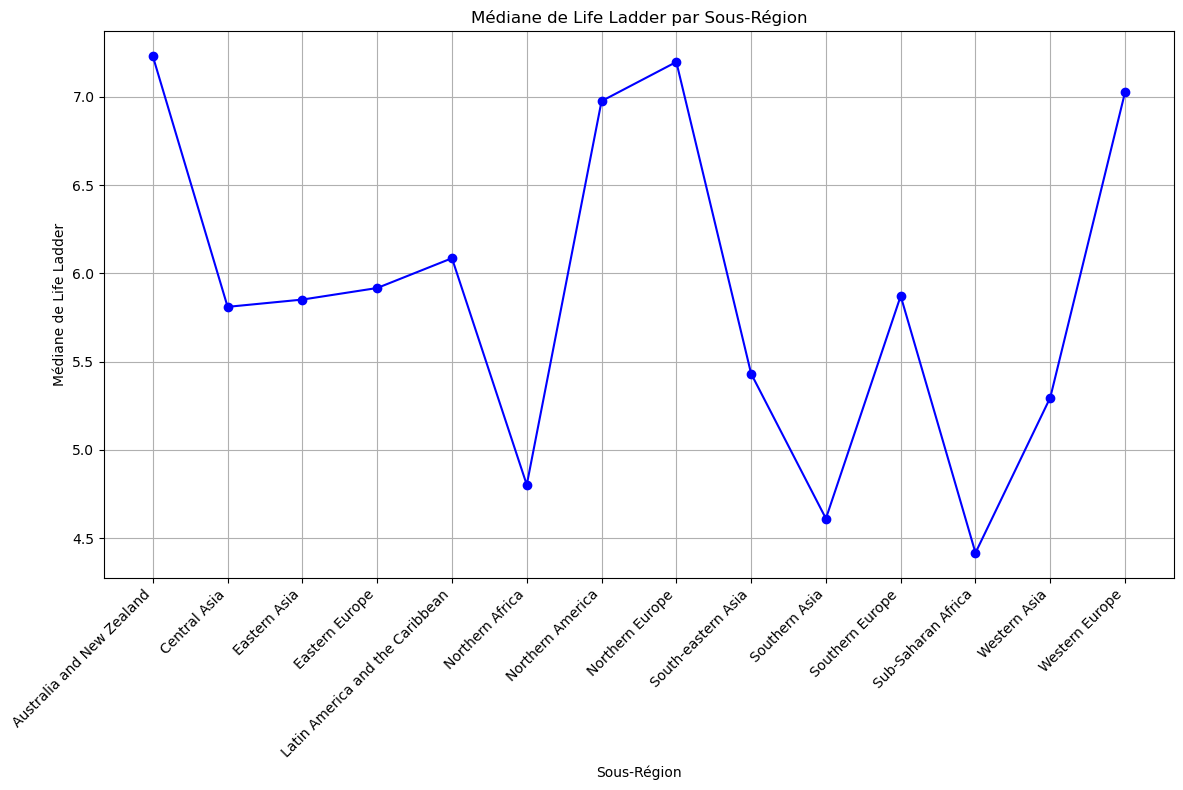

In [21]:
# Création d'un tracé en courbe des médianes
plt.figure(figsize=(12, 8))
plt.plot(median_df['Sub region'], median_df['Life Ladder'], marker='o', linestyle='-', color='b')

plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Sous-Région')
plt.ylabel('Médiane de Life Ladder')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()  # Ajustement des marges pour éviter que les labels ne se chevauchent
plt.show()

In [34]:
#Calcule de la médiane de 'Life Ladder' pour chaque année et chaque sous-région
median_life_ladder_by_region = df_2024.groupby(['Sub region', df.index])['Life Ladder'].median().unstack()
median_life_ladder_by_region.head()

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Sub region,,,,,,,,,,
Australia and New Zealand,7.297221,7.363591,7.237884,7.292110,7.273640,7.219585,7.197375,7.124150,7.004841,7.000269
Central Asia,5.787379,5.791460,5.533552,5.829234,5.497469,5.685221,6.005100,5.874504,5.837060,6.104471
Eastern Asia,5.629688,5.780211,5.726536,5.618181,5.793575,5.781067,5.902030,5.977095,5.950014,6.111919
Eastern Europe,5.781342,5.886515,5.716365,5.821891,5.809024,5.821453,6.038050,5.978069,6.044073,5.965178
Latin America and the Caribbean,6.136096,6.018496,6.117638,6.157342,6.055761,6.085955,5.634217,6.000352,6.137612,6.295973


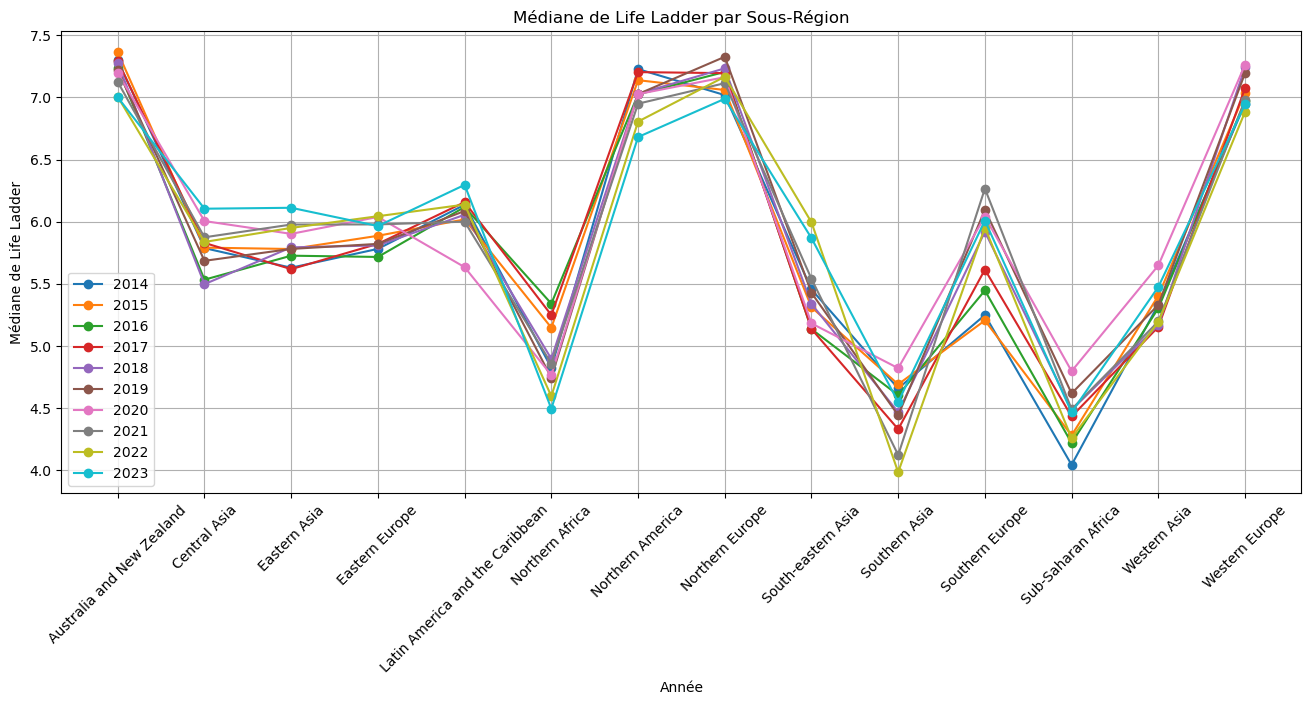

In [36]:
plt.figure(figsize=(16, 6))
for region in median_life_ladder_by_region.columns:
    plt.plot(median_life_ladder_by_region.index, median_life_ladder_by_region[region], marker='o', label=region)

# Ajout des titres et labels
plt.title('Médiane de Life Ladder par Sous-Région')
plt.xlabel('Année')
plt.ylabel('Médiane de Life Ladder')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [38]:
# Filtre pour la sous-région "Western Europe"
df_western_europe = df_filtered[df_filtered['Sub region'] == 'Western Europe']
print(df_western_europe.dtypes)
print(df_western_europe)

Life Ladder    float64
Sub region      object
dtype: object
      Life Ladder      Sub region
Year                             
2014     6.950000  Western Europe
2015     7.076447  Western Europe
2016     7.048072  Western Europe
2017     7.293728  Western Europe
2018     7.396002  Western Europe
...           ...             ...
2019     7.694221  Western Europe
2020     7.508435  Western Europe
2021     7.327672  Western Europe
2022     6.883844  Western Europe
2023     6.968833  Western Europe

[68 rows x 2 columns]


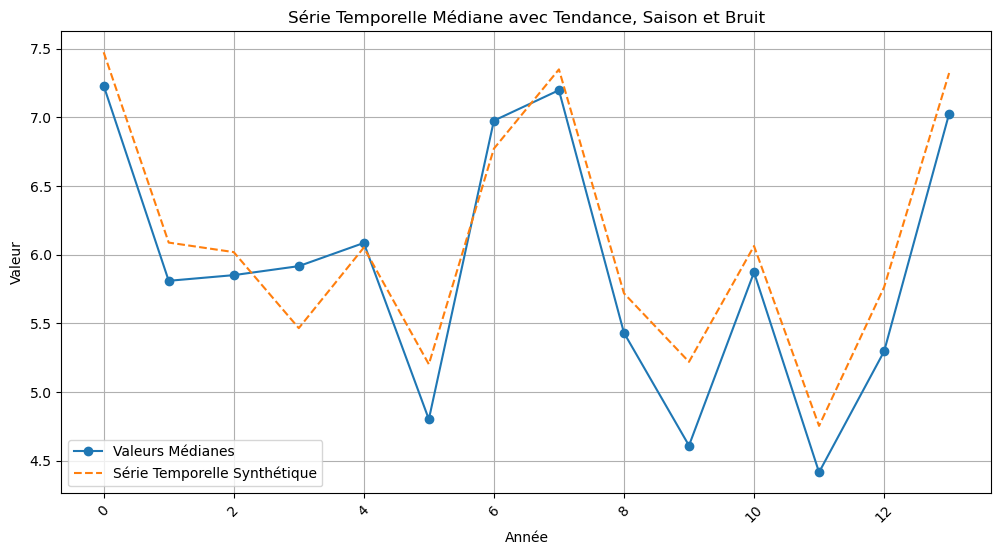

In [39]:
# Définition des paramètres pour tendance, saisonnalité et bruit
trend_slope = 0.02  # Pente de la tendance
seasonal_amplitude = 0.5  # Amplitude de la saisonnalité
seasonal_period = 2  # Période de la saisonnalité
noise_std = 0.2  # Écart type du bruit

# Extraction des valeurs : médiane
values = median_df['Life Ladder'].values

# Générer la tendance
trend = np.linspace(trend_slope * np.arange(len(values)).min(), trend_slope * np.arange(len(values)).max(), len(values))

# Générer la saisonnalité
seasonal = seasonal_amplitude * np.sin(2 * np.pi * np.arange(len(values)) / seasonal_period)

# Générer le bruit
noise = np.random.normal(scale=noise_std, size=len(values))

# Ajouter des composantes à la série médiane
median_df['Synthetic Value'] = values + trend + seasonal + noise

# Visualisation de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(median_df.index, median_df['Life Ladder'], label='Valeurs Médianes', marker='o')
plt.plot(median_df.index, median_df['Synthetic Value'], label='Série Temporelle Synthétique', linestyle='--')
plt.title('Série Temporelle Médiane avec Tendance, Saison et Bruit')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

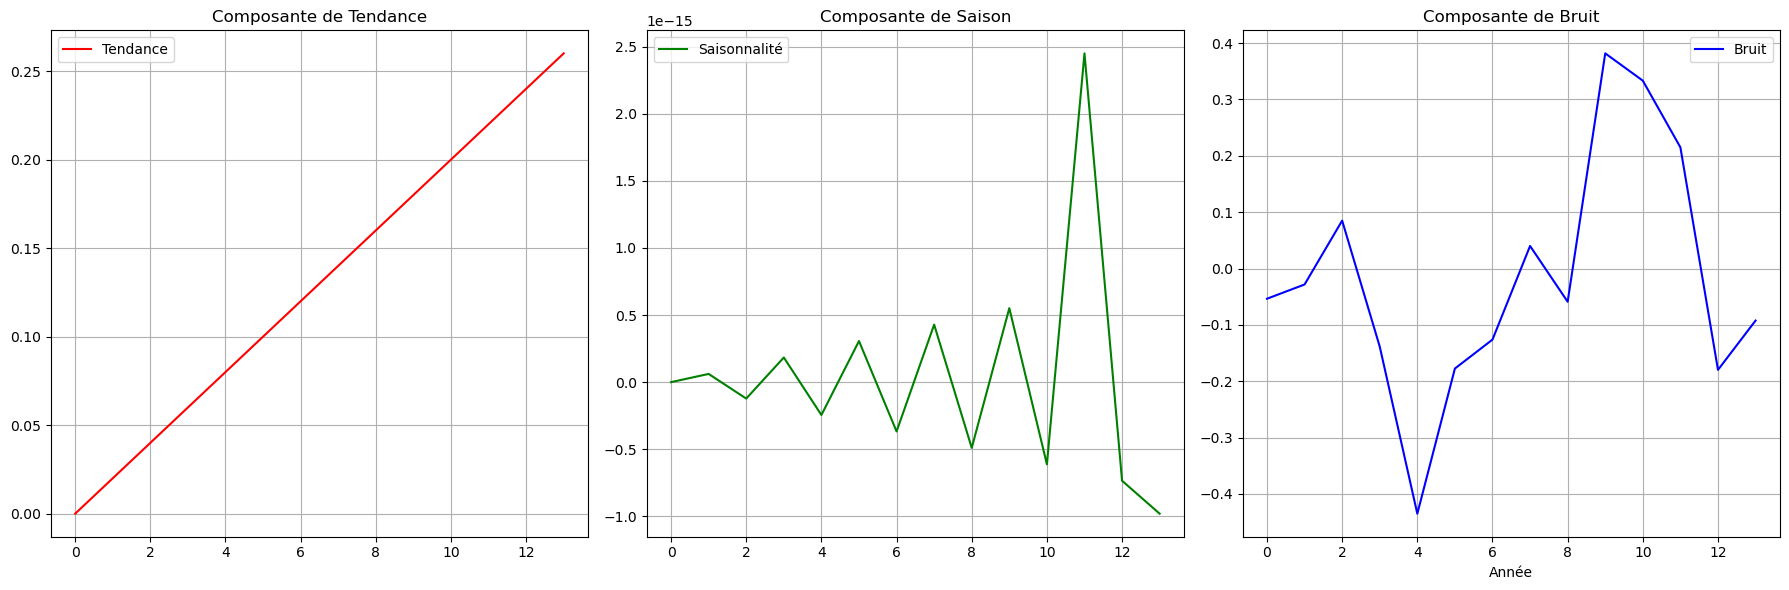

In [26]:
# Création des sous-graphes pour les composantes
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Tracer la tendance
axs[0].plot(median_df.index, trend, label='Tendance', color='r')
axs[0].set_title('Composante de Tendance')
axs[0].legend()
axs[0].grid(True)

# Tracer la saisonnalité
axs[1].plot(median_df.index, seasonal, label='Saisonnalité', color='g')
axs[1].set_title('Composante de Saison')
axs[1].legend()
axs[1].grid(True)

# Tracer le bruit
axs[2].plot(median_df.index, noise, label='Bruit', color='b')
axs[2].set_title('Composante de Bruit')
axs[2].legend()
axs[2].grid(True)

# Ajouter des titres et labels communs
plt.xlabel('Année')
plt.tight_layout()
plt.show()

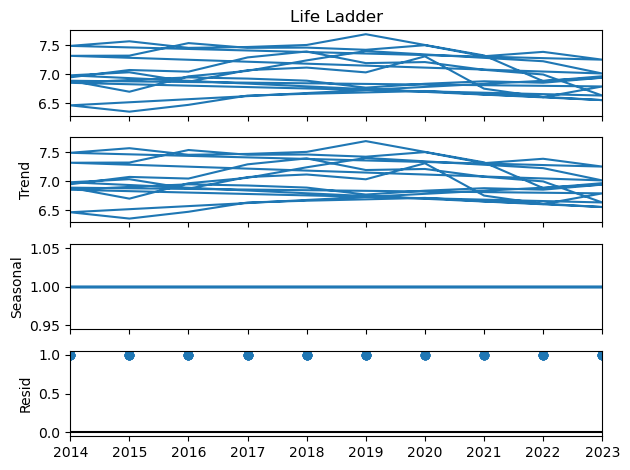

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Décomposition de la série temporelle 'Life Ladder'
decomposition = seasonal_decompose(df_western_europe['Life Ladder'], model='multiplicative', period=1)

# Visualisation de la décomposition
decomposition.plot()
plt.show()


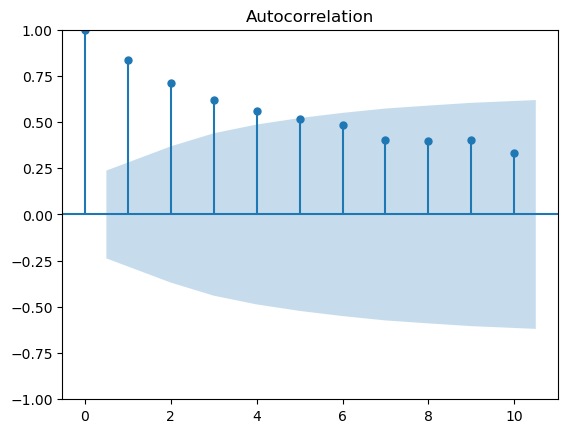

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer la fonction d'autocorrélation
plot_acf(df_western_europe['Life Ladder'], lags=10)
plt.show()

Interpretation : 

Les premiers lags montrent une autocorrélation significative et décroissante progressivement, ce qui est typique des séries chronologiques qui présentent une tendance.
Cependant, il n'y a pas de motif clair de répétition régulière à un lag particulier (par exemple, tous les 12 mois), ce qui suggère l'absence d'une saisonnalité forte dans les données. 
La série présente plutôt une dépendance temporelle ou une persistance où les valeurs actuelles sont fortement influencées par les valeurs passées, mais sans variations saisonnières évidentes.